In [2]:
# Nepieciešamās bibliotēkas un bibliotēku moduļi:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Moduļi datu normēšanai
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split


# Parauga datu kopas:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.datasets import make_blobs
import mglearn

ModuleNotFoundError: No module named 'mglearn'

### Izvairīšanās no pārmērīgas modeļa pielāgošanas  
'Ovefitting' ir situācija, kad modelim tiek vai nu iedots pārāk liels piedzenamo koeficientu skaits relatīvi pret datu punktiem vai arī modelis tā vietā, lai iemācītos sakarības, kuras atrodamas datos, iemācās datu kopu.  

In [5]:
from sklearn.neighbors import KNeighborsRegressor

Tāpat kā izmantojot koeficientu piedzīšanu mēs varējām izmantot plakni, lai risinātu klasifikācijas uzdevumus, ir iespējams izmantot klasifikācijas tipa algoritmu, lai risinātu regresijas problēmu.

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

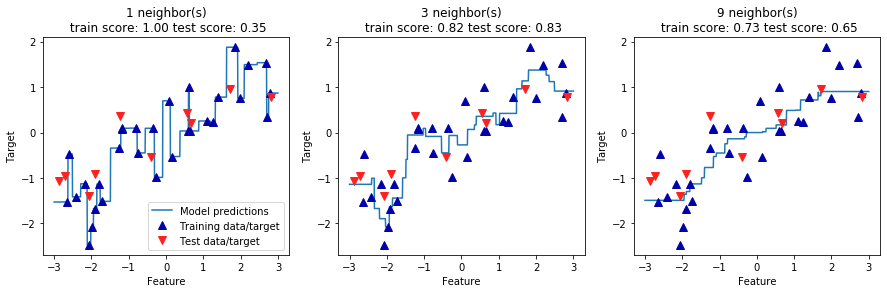

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

### Lēmumu koku optimizēšana    
Lēmumu koki ir ārkārtīgi spēcīga klasifikācijas metode, kuras vislielākais trūkums ir overfittings.  
Par laimi, ar šo problēmu var cīnīties ar dažām metodēm. 
* Koku apcirpšana  
* Koku ansambļi  

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

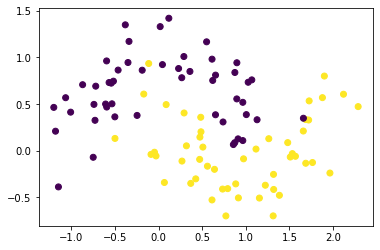

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


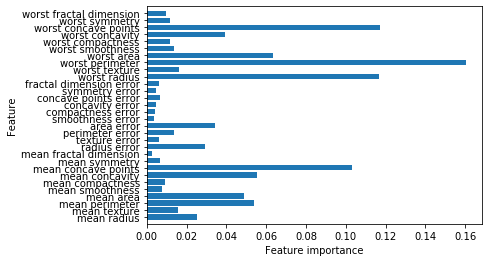

In [12]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [3]:
# Uzdevums: 
# Izmēģiniet ar knn algoritmu un cancer datu kopu palielināt kaimiņu skaitu (1-8) un 
# atlieciet grafikā treniņkopas un testa kopas precizitāti

In [ ]:
# Uzdevums:
